In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import datetime as dt
from netCDF4 import date2num,num2date
import cftime
from math import sqrt
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import animation 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import manifold
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import experimental
from tensorflow import keras

from MWDC import preprocessing
from MWDC import evaluation


import dask.dataframe

In [2]:
path = ('./ERA5_meteo_sfc_2021_daily.nc')
data = xr.open_dataset(path, decode_times=False) 
data

<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sp         (time, latitude, longitude) float64 ...
    sst        (time, latitude, longitude) float64 ...
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

In [4]:
tf_data = preprocessing.datatransformation(data)
tf_data

sp(43.0,-33.0)  sp(42.75,-33.0)  sp(42.5,-33.0)  sp(42.25,-33.0)  \
0.0     102443.676498    102431.303226   102417.453815    102405.135686   
1.0     101345.768122    101317.220943   101287.358812    101259.804210   
2.0     100624.067447    100584.979445   100543.863872    100504.640134   
3.0     100114.540603    100040.682731    99966.880003     99897.586286   
4.0     100697.759889    100618.637969   100538.930682    100461.853300   
...               ...              ...             ...              ...   
360.0    98843.817016     98872.778201    98904.362934     98940.904619   
361.0    98579.721408     98638.305796    98693.424812     98748.838058   
362.0    98894.706481     98944.369990    98993.923163     99046.639304   
363.0    98648.542535     98667.708326    98687.585171     98714.294683   
364.0    99352.016962     99374.263991    99394.267519     99417.924398   

       sp(42.0,-33.0)  sp(41.75,-33.0)  sp(41.5,-33.0)  sp(41.25,-33.0)  \
0.0     102391.629859    102376.995718   102354.929979    102331.617157   
1.0     101229.348230    101197.229473   101161.144651    101128.482946   
2.0     100464.109927    100422.816199   100374.396282    100326.188453   
3.0      99832.547075     99775.380607    99718.328667     99667.461243   
4.0     100384.593521    100308.381461   100226.426032    100147.134440   
...               ...              ...             ...              ...   
360.0    98979.865525     99023.685306    99065.608941     99111.557801   
361.0    98802.518619     98855.263365    98898.519207     98940.773850   
362.0    99101.378273     99158.916511    99210.345398     99260.842557   
363.0    98744.252980     98774.538199    98798.971517     98822.415897   
364.0    99442.226948     99467.685983    99488.429172     99510.095914   

       sp(41.0,-33.0)  sp(40.75,-33.0)  ...  t2m(35.25,-23.0)  \
0.0     102306.463402    102286.930005  ...        290.000848   
1.0     101095.235875    101068.601739  ...        290.632579   
2.0     100276.279671    100234.684777  ...        290.797767   
3.0      99619.999967     99586.044519  ...        290.893986   
4.0     100068.479115     99995.435665  ...        290.343238   
...               ...              ...  ...               ...   
360.0    99163.068418     99225.224426  ...        292.431912   
361.0    98981.140520     99028.262212  ...        292.397667   
362.0    99311.495004     99370.504390  ...        292.438388   
363.0    98845.627345     98877.167126  ...        292.060683   
364.0    99533.188853     99563.850032  ...        292.161647   

       t2m(35.0,-23.0)  t2m(34.75,-23.0)  t2m(34.5,-23.0)  t2m(34.25,-23.0)  \
0.0         290.122430        290.264916       290.442410        290.577520   
1.0         290.666912        290.741103       290.869634        290.979348   
2.0         290.884106        290.933596       290.999557        291.061465   
3.0         290.875573        290.855689       290.940658        291.090622   
4.0         290.741350        290.962192       291.019160        291.073186   
...                ...               ...              ...               ...   
360.0       292.528418        292.677360       292.888889        293.059160   
361.0       292.426311        292.512561       292.647280        292.745454   
362.0       292.575405        292.739702       292.944218        293.099881   
363.0       292.187234        292.369033       292.632800        292.846336   
364.0       292.251898        292.404644       292.608810        292.749538   

       t2m(34.0,-23.0)  t2m(33.75,-23.0)  t2m(33.5,-23.0)  t2m(33.25,-23.0)  \
0.0         290.716088        290.867770       291.004767        291.069088   
1.0         291.094496        291.188648       291.258157        291.281510   
2.0         291.153361        291.255193       291.347718        291.426658   
3.0         291.246660        291.372272       291.492091        291.587344   
4.0         291.165834        291.315630       291.485410        291.615917   
.

In [5]:
tf_data.shape

(365, 11767)

In [6]:
tf_data.isna().sum()

sp(43.0,-33.0)      0
sp(42.75,-33.0)     0
sp(42.5,-33.0)      0
sp(42.25,-33.0)     0
sp(42.0,-33.0)      0
                   ..
t2m(34.0,-23.0)     0
t2m(33.75,-23.0)    0
t2m(33.5,-23.0)     0
t2m(33.25,-23.0)    0
t2m(33.0,-23.0)     0
Length: 11767, dtype: int64

In [7]:
features = tf_data.dropna()


p_labels = features
features

sp(43.0,-33.0)  sp(42.75,-33.0)  sp(42.5,-33.0)  sp(42.25,-33.0)  \
0.0     102443.676498    102431.303226   102417.453815    102405.135686   
1.0     101345.768122    101317.220943   101287.358812    101259.804210   
2.0     100624.067447    100584.979445   100543.863872    100504.640134   
3.0     100114.540603    100040.682731    99966.880003     99897.586286   
4.0     100697.759889    100618.637969   100538.930682    100461.853300   
...               ...              ...             ...              ...   
360.0    98843.817016     98872.778201    98904.362934     98940.904619   
361.0    98579.721408     98638.305796    98693.424812     98748.838058   
362.0    98894.706481     98944.369990    98993.923163     99046.639304   
363.0    98648.542535     98667.708326    98687.585171     98714.294683   
364.0    99352.016962     99374.263991    99394.267519     99417.924398   

       sp(42.0,-33.0)  sp(41.75,-33.0)  sp(41.5,-33.0)  sp(41.25,-33.0)  \
0.0     102391.629859    102376.995718   102354.929979    102331.617157   
1.0     101229.348230    101197.229473   101161.144651    101128.482946   
2.0     100464.109927    100422.816199   100374.396282    100326.188453   
3.0      99832.547075     99775.380607    99718.328667     99667.461243   
4.0     100384.593521    100308.381461   100226.426032    100147.134440   
...               ...              ...             ...              ...   
360.0    98979.865525     99023.685306    99065.608941     99111.557801   
361.0    98802.518619     98855.263365    98898.519207     98940.773850   
362.0    99101.378273     99158.916511    99210.345398     99260.842557   
363.0    98744.252980     98774.538199    98798.971517     98822.415897   
364.0    99442.226948     99467.685983    99488.429172     99510.095914   

       sp(41.0,-33.0)  sp(40.75,-33.0)  ...  t2m(35.25,-23.0)  \
0.0     102306.463402    102286.930005  ...        290.000848   
1.0     101095.235875    101068.601739  ...        290.632579   
2.0     100276.279671    100234.684777  ...        290.797767   
3.0      99619.999967     99586.044519  ...        290.893986   
4.0     100068.479115     99995.435665  ...        290.343238   
...               ...              ...  ...               ...   
360.0    99163.068418     99225.224426  ...        292.431912   
361.0    98981.140520     99028.262212  ...        292.397667   
362.0    99311.495004     99370.504390  ...        292.438388   
363.0    98845.627345     98877.167126  ...        292.060683   
364.0    99533.188853     99563.850032  ...        292.161647   

       t2m(35.0,-23.0)  t2m(34.75,-23.0)  t2m(34.5,-23.0)  t2m(34.25,-23.0)  \
0.0         290.122430        290.264916       290.442410        290.577520   
1.0         290.666912        290.741103       290.869634        290.979348   
2.0         290.884106        290.933596       290.999557        291.061465   
3.0         290.875573        290.855689       290.940658        291.090622   
4.0         290.741350        290.962192       291.019160        291.073186   
...                ...               ...              ...               ...   
360.0       292.528418        292.677360       292.888889        293.059160   
361.0       292.426311        292.512561       292.647280        292.745454   
362.0       292.575405        292.739702       292.944218        293.099881   
363.0       292.187234        292.369033       292.632800        292.846336   
364.0       292.251898        292.404644       292.608810        292.749538   

       t2m(34.0,-23.0)  t2m(33.75,-23.0)  t2m(33.5,-23.0)  t2m(33.25,-23.0)  \
0.0         290.716088        290.867770       291.004767        291.069088   
1.0         291.094496        291.188648       291.258157        291.281510   
2.0         291.153361        291.255193       291.347718        291.426658   
3.0         291.246660        291.372272       291.492091        291.587344   
4.0         291.165834        291.315630       291.485410        291.615917   
.

In [8]:
inputs = {}
for name, column in features.items():
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=tf.float32)

inputs

{'sp(43.0,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(43.0,-33.0)')>,
 'sp(42.75,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(42.75,-33.0)')>,
 'sp(42.5,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(42.5,-33.0)')>,
 'sp(42.25,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(42.25,-33.0)')>,
 'sp(42.0,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(42.0,-33.0)')>,
 'sp(41.75,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(41.75,-33.0)')>,
 'sp(41.5,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(41.5,-33.0)')>,
 'sp(41.25,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(41.25,-33.0)')>,
 'sp(41.0,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sp(41.0,-33.0)')>,
 'sp(40.75,-33.0)': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '

In [9]:
x_inputs = tf.keras.layers.Concatenate()(list(inputs.values()))
normalize = experimental.preprocessing.Normalization()
normalize.adapt(np.array(features[features.keys()]))
normalized_data = [normalize(x_inputs)]

normalized_data


[<KerasTensor: shape=(None, 11767) dtype=float32 (created by layer 'normalization')>]

In [10]:
preprocessing_layer = tf.keras.Model(inputs, normalized_data, name="ProcessData")


In [11]:
items_features_dict = {name: np.array(value) for name, value in features.items()}
items_features_dict

{'sp(43.0,-33.0)': array([102443.67649803, 101345.76812171, 100624.06744694, 100114.54060299,
        100697.75988922, 102113.61936186, 103074.47158767, 102939.57874492,
        102238.91729847, 102181.22909176, 101257.55606681, 101195.9230048 ,
        101885.68307689, 101036.46177284, 101703.43076151, 101891.23132501,
        100170.76539563, 100017.83226294, 100751.43537214, 100270.70173019,
        101346.98127077, 101204.58047758, 101075.16801447, 100056.87784697,
         99886.15044758,  99913.20451981,  99572.04240385,  99333.42531709,
        100302.01454944, 100258.88837315, 100512.33472246,  99812.10593756,
        100542.7864604 , 102075.65543171, 103073.55112143, 102690.81532062,
        101829.1316672 , 101712.47423626, 100925.19564416,  99859.46116842,
         99162.84213822,  99368.92477311,  99691.94479642,  99490.12939211,
        100183.26592101, 100954.48937618, 101296.13929683, 101363.30363984,
         99435.41043134,  99657.84088598, 100549.07277822,  99550.0911

In [12]:
sample_fitted = preprocessing_layer(items_features_dict)

# sample_fitted = tf.reshape(sample_fitted, [5,2000])
sample_fitted

<tf.Tensor: shape=(365, 11767), dtype=float32, numpy=
array([[ 7.7550519e-01,  7.5328851e-01,  7.2946608e-01, ...,
        -9.1811669e-01, -9.3105543e-01, -9.6214294e-01],
       [-3.2096916e-01, -3.6770245e-01, -4.1570905e-01, ...,
        -8.1493556e-01, -8.4337735e-01, -8.7131399e-01],
       [-1.0417181e+00, -1.1044830e+00, -1.1691233e+00, ...,
        -7.7846241e-01, -7.8347260e-01, -7.7736849e-01],
       ...,
       [-2.7688174e+00, -2.7552607e+00, -2.7397530e+00, ...,
         2.4816651e-02,  6.1718526e-04, -1.6031655e-02],
       [-3.0146587e+00, -3.0336316e+00, -3.0501771e+00, ...,
        -2.2206988e-02, -2.5342382e-02, -3.8065560e-02],
       [-2.3121047e+00, -2.3226979e+00, -2.3340666e+00, ...,
        -1.1928645e-01, -1.2382751e-01, -1.2617554e-01]], dtype=float32)>

In [13]:
full_dim = sample_fitted.shape.as_list()[1]
full_dim

11767

In [14]:
# these are the downsampling/upsampling dimensions
encoding_dim1 = 4096
encoding_dim2 = 1024
encoding_dim3 = 256
encoding_dim4 = 64
encoding_dim5 = 8 # we will use these 8 dimensions for clustering

# This is our encoder input
encoder_input_data = keras.Input(shape=(full_dim,))

# the encoded representation of the input
encoded_layer1 = keras.layers.Dense(encoding_dim1, activation='relu')(encoder_input_data)
encoded_layer2 = keras.layers.Dense(encoding_dim2, activation='relu')(encoded_layer1)
encoded_layer3 = keras.layers.Dense(encoding_dim3, activation='relu')(encoded_layer2)
encoded_layer4 = keras.layers.Dense(encoding_dim4, activation='relu')(encoded_layer3)
encoded_layer5 = keras.layers.Dense(encoding_dim5, activation='relu', name="ClusteringLayer")(encoded_layer4)
# Note that encoded_layer5 is our 8 dimensional "clustered" layer, which we will later use for clustering

encoder_model = keras.Model(encoder_input_data, encoded_layer5)

# the reconstruction of the input
decoded_layer5 = keras.layers.Dense(encoding_dim4, activation='relu')(encoded_layer5)
decoded_layer4 = keras.layers.Dense(encoding_dim3, activation='relu')(decoded_layer5)
decoded_layer3 = keras.layers.Dense(encoding_dim2, activation='relu')(decoded_layer4)
decoded_layer2 = keras.layers.Dense(encoding_dim1, activation='relu')(decoded_layer3)
decoded_layer1 = keras.layers.Dense(full_dim, activation='relu')(decoded_layer2)

# This model maps an input to its autoencoder reconstruction
autoencoder_model = keras.Model(encoder_input_data, outputs=decoded_layer1, name="Encoder")
autoencoder_model.summary()

# compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
autoencoder_model.compile(optimizer=opt , loss=tf.keras.losses.mean_squared_error)


Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11767)]           0         
_________________________________________________________________
dense (Dense)                (None, 4096)              48201728  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
ClusteringLayer (Dense)      (None, 8)                 520       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                576 

In [15]:
# process the inputs
p_items = preprocessing_layer(items_features_dict)


# split into training and testing sets (90/10 split)
train_data, test_data, train_labels, test_labels = train_test_split(p_items.numpy(), p_labels, train_size=0.9)

# fit the model using the training data
history = autoencoder_model.fit(train_data, train_data, epochs=500, batch_size=128, shuffle=True, validation_data=(test_data, test_data))


Epoch 1/500
3/3 [==============================] - 11s 3s/step - loss: 0.9797 - val_loss: 1.1239
Epoch 2/500
3/3 [==============================] - 6s 2s/step - loss: 0.9469 - val_loss: 1.0969
Epoch 3/500
3/3 [==============================] - 6s 2s/step - loss: 0.9241 - val_loss: 1.0732
Epoch 4/500
3/3 [==============================] - 6s 2s/step - loss: 0.9071 - val_loss: 1.0559
Epoch 5/500
3/3 [==============================] - 6s 2s/step - loss: 0.8973 - val_loss: 1.0298
Epoch 6/500
3/3 [==============================] - 6s 2s/step - loss: 0.8832 - val_loss: 1.0090
Epoch 7/500
3/3 [==============================] - 7s 2s/step - loss: 0.8694 - val_loss: 0.9972
Epoch 8/500
3/3 [==============================] - 6s 2s/step - loss: 0.8618 - val_loss: 0.9894
Epoch 9/500
3/3 [==============================] - 7s 2s/step - loss: 0.8554 - val_loss: 0.9818
Epoch 10/500
3/3 [==============================] - 6s 2s/step - loss: 0.8488 - val_loss: 0.9729
Epoch 11/500
3/3 [====================

[Text(0, 0.5, 'log_10(loss)'), Text(0.5, 0, 'Training Epoch')]

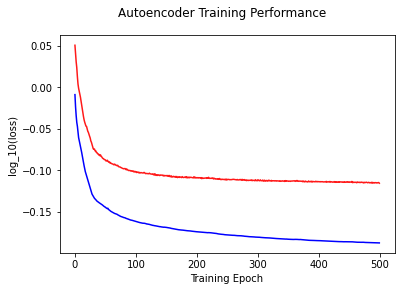

In [16]:
#Training performance

history_fig, (ax1) = plt.subplots(1)
history_fig.suptitle('Autoencoder Training Performance')
ax1.plot(range(0,500), np.log10(history.history['loss']), color='blue')
ax1.plot(range(0,500), np.log10(history.history['val_loss']), color='red', alpha=0.9)
ax1.set(ylabel='log_10(loss)', xlabel='Training Epoch')

In [17]:
encoded_items = encoder_model(p_items)

distortions = []
inertias = []
K = range(1,20, 2)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(encoded_items)
    distortions.append(sum(np.min(cdist(encoded_items, km.cluster_centers_,'euclidean'), axis=1)) / encoded_items.shape[0])
    inertias.append(km.inertia_)


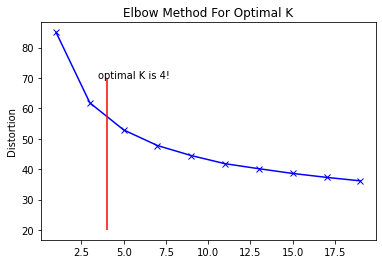

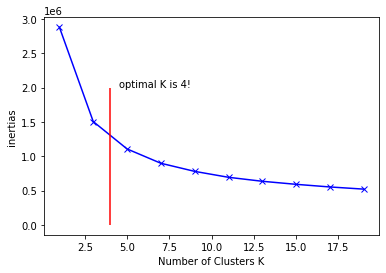

In [28]:
plt.plot(K, distortions, 'bx-')
plt.vlines(ymin=20, ymax=70, x=4, colors='red')
plt.text(x=3.5, y=70, s="optimal K is 4!")
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.vlines(ymin=1, ymax=2000000, x=4, colors='red')
plt.text(x=4.5, y=2000000, s="optimal K is 4!")
plt.xlabel('Number of Clusters K')
plt.ylabel('inertias')
plt.show()

In [19]:
encoded_items.numpy().shape

(365, 8)

In [29]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(encoded_items)
P = kmeans.predict(encoded_items)
features['Cluster'] = kmeans.labels_
labels =  kmeans.labels_
labels

array([3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 0, 0, 0, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 2, 2, 3, 3, 3, 3, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3,
       3, 3, 3, 2, 2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 1, 2, 2, 2, 2, 2, 3, 3, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [34]:
centers = kmeans.cluster_centers_
features

sp(43.0,-33.0)  sp(42.75,-33.0)  sp(42.5,-33.0)  sp(42.25,-33.0)  \
0.0     102443.676498    102431.303226   102417.453815    102405.135686   
1.0     101345.768122    101317.220943   101287.358812    101259.804210   
2.0     100624.067447    100584.979445   100543.863872    100504.640134   
3.0     100114.540603    100040.682731    99966.880003     99897.586286   
4.0     100697.759889    100618.637969   100538.930682    100461.853300   
...               ...              ...             ...              ...   
360.0    98843.817016     98872.778201    98904.362934     98940.904619   
361.0    98579.721408     98638.305796    98693.424812     98748.838058   
362.0    98894.706481     98944.369990    98993.923163     99046.639304   
363.0    98648.542535     98667.708326    98687.585171     98714.294683   
364.0    99352.016962     99374.263991    99394.267519     99417.924398   

       sp(42.0,-33.0)  sp(41.75,-33.0)  sp(41.5,-33.0)  sp(41.25,-33.0)  \
0.0     102391.629859    102376.995718   102354.929979    102331.617157   
1.0     101229.348230    101197.229473   101161.144651    101128.482946   
2.0     100464.109927    100422.816199   100374.396282    100326.188453   
3.0      99832.547075     99775.380607    99718.328667     99667.461243   
4.0     100384.593521    100308.381461   100226.426032    100147.134440   
...               ...              ...             ...              ...   
360.0    98979.865525     99023.685306    99065.608941     99111.557801   
361.0    98802.518619     98855.263365    98898.519207     98940.773850   
362.0    99101.378273     99158.916511    99210.345398     99260.842557   
363.0    98744.252980     98774.538199    98798.971517     98822.415897   
364.0    99442.226948     99467.685983    99488.429172     99510.095914   

       sp(41.0,-33.0)  sp(40.75,-33.0)  ...  t2m(35.0,-23.0)  \
0.0     102306.463402    102286.930005  ...       290.122430   
1.0     101095.235875    101068.601739  ...       290.666912   
2.0     100276.279671    100234.684777  ...       290.884106   
3.0      99619.999967     99586.044519  ...       290.875573   
4.0     100068.479115     99995.435665  ...       290.741350   
...               ...              ...  ...              ...   
360.0    99163.068418     99225.224426  ...       292.528418   
361.0    98981.140520     99028.262212  ...       292.426311   
362.0    99311.495004     99370.504390  ...       292.575405   
363.0    98845.627345     98877.167126  ...       292.187234   
364.0    99533.188853     99563.850032  ...       292.251898   

       t2m(34.75,-23.0)  t2m(34.5,-23.0)  t2m(34.25,-23.0)  t2m(34.0,-23.0)  \
0.0          290.264916       290.442410        290.577520       290.716088   
1.0          290.741103       290.869634        290.979348       291.094496   
2.0          290.933596       290.999557        291.061465       291.153361   
3.0          290.855689       290.940658        291.090622       291.246660   
4.0          290.962192       291.019160        291.073186       291.165834   
...                 ...              ...               ...              ...   
360.0        292.677360       292.888889        293.059160       293.161395   
361.0        292.512561       292.647280        292.745454       292.810912   
362.0        292.739702       292.944218        293.099881       293.206281   
363.0        292.369033       292.632800        292.846336       293.011309   
364.0        292.404644       292.608810        292.749538       292.832591   

       t2m(33.75,-23.0)  t2m(33.5,-23.0)  t2m(33.25,-23.0)  t2m(33.0,-23.0)  \
0.0          290.867770       291.004767        291.069088       291.095877   
1.0          291.188648       291.258157        291.281510       291.312004   
2.0          291.255193       291.347718        291.426658       291.535552   
3.0          291.372272       291.492091        291.587344       291.698686   
4.0          291.315630       291.485410        291.615917       291.696002   
...          

In [33]:
rmse = evaluation.RMSE(features, labels,'',normalize=True)
rmse

AttributeError: 'str' object has no attribute 'Cluster'

In [35]:
spat_corr = evaluation.Spat_Corr(features, labels, tf_data, normalize=False)
spat_corr

AttributeError: 'DataFrame' object has no attribute 'data_vars'